# EDA

## Prepare the workspace

In [1]:
#### Import the needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

re_df = pd.read_csv(r"D:\Data science project\Data science\Codveda-internship\Level 1\Task 2\processed_real_estate.csv") # Load the data
re_df

,name,sqm,year_built,Price(EGP),Price/Sqm,has_main_facilities,has_security_features,has_parking_safety,has_building_facilities,has_other_features,...,propertySubType_Retail,Is sqm outlier,Is Price/Sqm outlier,Is Price(EGP) outlier,Is BuildingNumber outlier,Is FloorNumber outlier,Is UnitNumber outlier,log(sqm),log(price),log(price/sqm)
0,Alamain (Latin District),92.86,2025,6594000,71010.1228,1,1,0,0,1,...,0,False,False,False,False,False,False,4.531093,15.701671,11.170578
1,Beachfront Tower - B1,398.00,2025,66104000,166090.4523,0,0,0,0,1,...,0,True,True,True,False,False,False,5.986452,18.006740,12.020288
2,PODIA,93.00,2025,12824000,137892.4731,0,1,1,0,1,...,0,False,True,False,False,True,False,4.532599,16.366829,11.834229
3,Mazarine Apartment,252.00,2025,12857000,51019.8413,1,1,0,0,0,...,0,False,False,False,False,False,False,5.529429,16.369399,10.839970
4,Alamain (Latin District),209.42,2025,8721000,41643.5870,1,1,0,0,1,...,0,False,False,False,False,False,False,5.344342,15.981244,10.636903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,Alamain (Latin District),177.47,2025,5678000,31994.1399,1,1,0,0,1,...,0,False,False,False,False,False,False,5.178802,15.552110,10.373308
925,Jade Park,692.00,2025,25292000,36549.1329,1,0,1,1,0,...,0,True,False,True,False,False,False,6.539586,17.045999,10.506413
926,Mamsha Avenue,171.00,2025,6137000,35888.8889,1,1,0,0,1,...,0,False,False,False,False,False,False,5.141664,15.629847,10.488183
927,Alamain (Latin District),207.58,2025,5933000,28581.7516,1,1,0,0,1,...,0,False,False,False,False,False,False,5.335517,15.596041,10.260524


## Ydata report
> To see the distributions, and the main data of every column

In [ ]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(re_df, title="Real estates re_df Report")
# profile.to_file("real_estates_profile_report.html")

# This script is commented to avoid the repetition 

### Summary of every column

#### Continuous numerical data:
- I have heavy peaked and right-skewed distributions with high kurtosis and high skewness values for sqm, price, price/sqm, Floor number, building number, and unit number, indicating high outlier ratio in our data, wider or fatter shape, and mean > median which I have processed by adding an indicator for each continuous numerical data.
- The log of price and sqm have thinner and roughly normal distributions compared to the original ones, with mean ≈ median.
- The log of price/sqm has a thinner shape with low outliers compared to the original one, with a moderate skewness to the right, indicating mean slightly greater than median.

#### Categorical data:
- 71.5% of real estates are built in 2025
- Features like facilities (sports, office, etc.), green view, modern design, water features (pool, lake, etc.), main facilities (Electricity, etc.), parking safety, building facilities (lobby, elevator, etc.), other features (bathrooms, etc.), and security features (Security Gate) are very common in our data, with very few real estates lacking these features
- Low and mid floors are very common, but high-floor real estates are rare as high floors (above 7) are not licensed
- The most common number of bedrooms is 3, followed by 0 (likely commercial real estates). The rarest is 1 bedroom, as most residential real estates cater to full families including parents and children
- Most real estates don't have full bathrooms but may have small bathrooms
- The most common location is North Coast due to summer season conditions, with clear and pleasant weather making Northern Egypt's coastal areas the most popular for real estate sales
- The most common real estates region or governorate is Matrouh due to North coast city is between Alexandria, and Matrouh governments, but Alexandria not the second one due to most of cities in the data are owned by Cairo government, so that's why Alexandria become the third.
- Most of real estates are residential with 83% from the data
- The most common type of residential properties is Apartments which are multi story, or have two or more floors.

## Correlations, and relationships(Visualizations)
- The log of (Price, sqm, price/sqm) are better than the original as the shape of them are very squeezed opposite to the log of them.
- The log of  (price/sqm) shows a linear relationship with log(price) with less outliers than the original ones.
- The log of (sqm) shows non-linear relationship with log(price).
- FloorNumber, BuildingNumber, and UnitNumber aren't correlated with log(price)

### Categorical data vs. log(price) charts

#### Return the original column of dummies

In [3]:
re_df.columns

Index(['name', 'sqm', 'year_built', 'Price(EGP)', 'Price/Sqm',
       'has_main_facilities', 'has_security_features', 'has_parking_safety',
       'has_building_facilities', 'has_other_features', 'HighFloor',
       'LowFloor', 'MidFloor', 'FloorNumber', 'BuildingNumber', 'UnitNumber',
       'has_modern', 'has_facilities', 'has_green_view', 'has_water_feature',
       'Bedroom_0', 'Bedroom_1', 'Bedroom_2', 'Bedroom_3', 'Bedroom_above 3',
       'Bathroom_0', 'Bathroom_1', 'Bathroom_2', 'Bathroom_above 2',
       'city_Cairo', 'city_Mansoura', 'city_Mersa Matruh',
       'city_New Administrative Capital', 'city_New Cairo', 'city_North Coast',
       'city_Old Cairo', 'governorate_Alexandria', 'governorate_Cairo',
       'governorate_Dakahlia', 'governorate_Matrouh',
       'propertyCategory_Commercial', 'propertyCategory_Residential',
       'propertySubType_Apartment (Residential - Multi-Story Units)',
       'propertySubType_Office', 'propertySubType_Others(very rare)',
       'prope

In [4]:
temp_df = pd.DataFrame()  # create a temporary data frame


# Return the original column in the temp df
keywords = ["Bedroom", "Bathroom", "city", "governorate", "propertyCategory", "propertySubType"]

# return the columns that starts with the keyword to the original column as rows
for col in keywords:
    dummies = re_df[re_df.columns[re_df.columns.str.startswith(col)]]
    temp_df[col] = pd.from_dummies(dummies, sep="_")
temp_df["log(price)"] = re_df["log(price)"]
temp_df["Is outlier"] = re_df["Is Price(EGP) outlier"]

temp_df

,Bedroom,Bathroom,city,governorate,propertyCategory,propertySubType,log(price),Is outlier
0,1,0,North Coast,Alexandria,Residential,Apartment (Residential - Multi-Story Units),15.701671,False
1,3,above 2,Mersa Matruh,Matrouh,Residential,Apartment (Residential - Multi-Story Units),18.006740,True
2,0,0,Cairo,Cairo,Commercial,Office,16.366829,False
3,3,above 2,Mersa Matruh,Matrouh,Residential,Apartment (Residential - Multi-Story Units),16.369399,False
4,3,0,North Coast,Alexandria,Residential,Apartment (Residential - Multi-Story Units),15.981244,False
...,...,...,...,...,...,...,...,...
924,3,0,North Coast,Alexandria,Residential,Apartment (Residential - Multi-Story Units),15.552110,False
925,above 3,2,New Administrative Capital,Cairo,Residential,Apartment (Residential - Multi-Story Units),17.045999,True
926,3,0,New Administrative Capital,Cairo,Residential,Apartment (Residential - Multi-Story Units),15.629847,False
927,3,0,North Coast,Alexandria,Residential,Apartment (Residential - Multi-Story Units),15.596041,False


#### Bedrooms vs. price violin plot

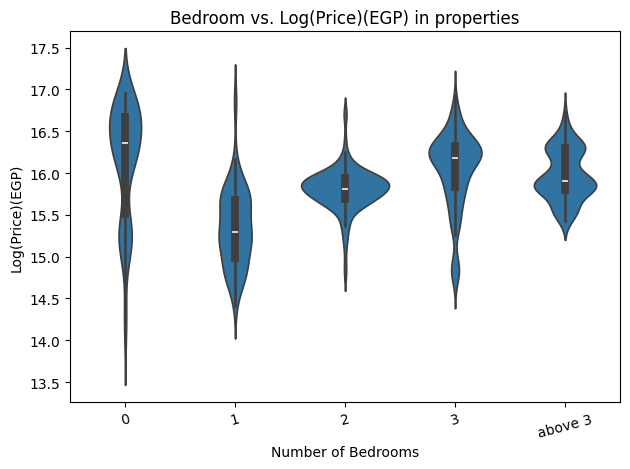

In [ ]:
def violin_plot(x:str, order:list[str]=None):
	"""Plot violin graph for every category in the column against log(price)

	Args:
		x (str): The name of categorical column
		order (list[str], optional): If you want a specific order of categories. Defaults to None.
	"""
	# Set y
	y = "log(price)"

	# Split the non_outlier prices from the full data
	non_outlier_data = temp_df[temp_df["Is outlier"] == False]

	# Plot x vs log(price)
	sns.violinplot(non_outlier_data, x=x, y=y, order=order)
	plt.title(f"{x} vs. Log(Price)(EGP) in properties")
	plt.ylabel("Log(Price)(EGP)")
	plt.xlabel(f"Number of {x}s")
	plt.xticks(rotation=15) # Rotate it to avoid overlapping
	plt.tight_layout()
	plt.show()

# Call the function with Bedroom data
violin_plot("Bedroom", ["0","1","2","3","above 3"])

### Bedrooms — observations (vs. log(price))

- **Bedroom = 0 (Commercial)**
    - Left-tailed, thin-shaped distribution
    - Mean ≈ 16.5, most values > 16
    - Outliers generally < 15

- **Bedroom = 1**
    - Left-tailed, moderate-shaped distribution
    - Mean ≈ 15.25
    - Most values < 16
    - Outliers generally > 16

- **Bedroom = 2**
    - Roughly normal distribution
    - Mean ≈ 16
    - Most values between 15.5-16.5

- **Bedroom = 3**
    - Left-tailed, wider shape than 0-bedroom properties
    - Mean ≈ 16.5 (similar to 0-bedroom)
    - High price range similar to commercial properties

- **Bedroom > 3**
    - Right-tailed, wide-shaped distribution
    - Mean ≈ 16 (similar to 2-bedroom)

### Bathrooms vs. log(price)

In [ ]:
temp_df["Bathroom"].unique() # To see the default order

array(['0', 'above 2', '2', '1'], dtype=object)

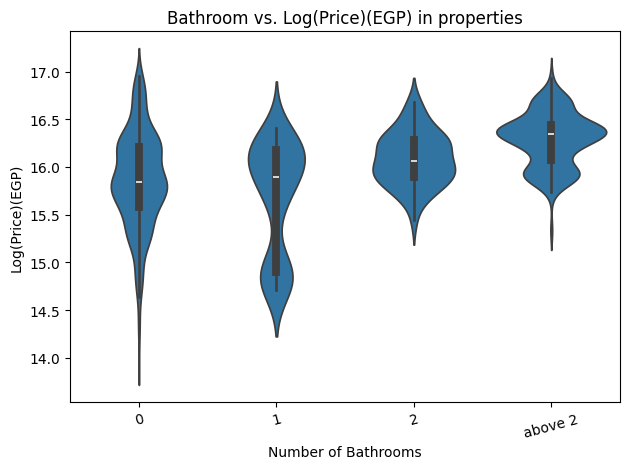

In [15]:
bathrooms_order = ["0","1","2","above 2"]
violin_plot("Bathroom", bathrooms_order)

### Bathrooms — observations (vs. log(price))

- **Bathroom = 0**
    - Wide-shaped, roughly normal distribution with a slight left skew.
    - Mean ≈ 15.75. Most outliers are below ≈ 14.5.

- **Bathroom = 1**
    - Bimodal appearance with a breakpoint at ≈ 15.25 that separates two sub-distributions.
    - Overall mean ≈ 15.75 (similar to Bathroom = 0). Most values fall between 15.5 and 16.5.

- **Bathroom = 2**
    - Roughly normally distributed and relatively wide.
    - Mean ≈ 16.25.

- **Bathroom > 2**
    - Approximately normal with a small skew; fewer observations than other groups.
    - Mean ≈ 16.5. Most values lie between 15.5 and 16.75.

#### Verify the bimodal distribution of Bathroom = 1 by plotting the histogram